In [1]:
#importing potentially useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import warnings #to remove warnings while working with the data
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing and loading dataset
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
gt = pd.read_csv('globalterrorism.csv')
gt.head(15)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

#### Data Exploration

In [3]:
gt.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
gt.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [5]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


Not helpful for decision-making or datatype of relevant columns

In [6]:
#get a fuller view of the column names
list(gt.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [7]:
gt.shape

(181691, 135)

In [8]:
gt.nunique()

eventid               181691
iyear                     47
imonth                    13
iday                      32
approxdate              2244
extended                   2
resolution              1859
country                  205
country_txt              205
region                    12
region_txt                12
provstate               2854
city                   36674
latitude               48322
longitude              48039
specificity                5
vicinity                   3
location               44109
summary               112492
crit1                      2
crit2                      2
crit3                      2
doubtterr                  3
alternative                5
alternative_txt            5
multiple                   2
success                    2
suicide                    2
attacktype1                9
attacktype1_txt            9
attacktype2                9
attacktype2_txt            9
attacktype3                8
attacktype3_txt            8
targtype1     

The data cuts across terrorism in 205 countries for 47 years, starting from 1970.

In [9]:
#creating new dataset with selected columns based on column description from kaggle and intended problem statement
gt1 = gt[['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt', 'city', 'success', 'suicide', 
        'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1', 'natlty1_txt', 'gname', 'motive', 
        'nperps', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 'nwound', 'property']]
gt1.head(10)

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,motive,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nwound,property
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,NaN,NaN,Unknown,NaN,1.0,0.0,0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,7.0,Unknown,NaN,0.0,0.0,0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,NaN,Unknown,NaN,1.0,0.0,0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN,1
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,1
5,1970,1,1,0,United States,North America,Cairo,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Cairo Police Headquarters,United States,Black Nationalists,To protest the Cairo Illinois Police Deparment,-99.0,Firearms,Unknown Gun Type,0.0,0.0,1
6,1970,1,2,0,Uruguay,South America,Montevideo,0,0,Assassination,Police,Police Security Forces/Officers,Juan Maria de Lucah/Chief of Directorate of in...,Uruguay,Tupamaros (Uruguay),NaN,3.0,Firearms,Automatic or Semi-Automatic Rifle,0.0,0.0,0
7,1970,1,2,0,United States,North America,Oakland,1,0,Bombing/Explosion,Utilities,Electricity,Edes Substation,United States,Unknown,NaN,-99.0,Explosives,Unknown Explosive Type,0.0,0.0,1
8,1970,1,2,0,United States,North America,Madison,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,1
9,1970,1,3,0,United States,North America,Madison,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,Selective Service Headquarters in Madison Wisc...,United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,Incendiary,Gasoline or Alcohol,0.0,0.0,1


In [10]:
#understanding the new dataset
gt1.shape

(181691, 22)

In [11]:
#insights into missing values
gt1.isnull().sum()

iyear                    0
imonth                   0
iday                     0
extended                 0
country_txt              0
region_txt               0
city                   434
success                  0
suicide                  0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                636
natlty1_txt           1559
gname                    0
motive              131130
nperps               71115
weaptype1_txt            0
weapsubtype1_txt     20768
nkill                10313
nwound               16311
property                 0
dtype: int64

In [12]:
#null values in percentage per column
gt1.isnull().mean() * 100

iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.238867
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     5.709144
target1              0.350045
natlty1_txt          0.858050
gname                0.000000
motive              72.171984
nperps              39.140629
weaptype1_txt        0.000000
weapsubtype1_txt    11.430396
nkill                5.676120
nwound               8.977330
property             0.000000
dtype: float64

In [13]:
#dropping columns with null value percent > 10
gt1 = gt1.drop(['motive', 'nperps', 'weapsubtype1_txt'], axis=1)
gt1.shape

(181691, 19)

In [14]:
#renaming columns for easy access
gt1.columns = ['Year', 'Month', 'Day', 'Extended', 'Country', 
                   'Region', 'City', 'Success', 'Suicide', 'Attack_Type', 
                   'Target_Type', 'Target_Subtype', 'Target', 'Target_Nationality', 
                   'Attack_Group', 'Weapon', 'No_Of_Killed', 'No_Of_Wounded', 'Property']

In [15]:
#checking datatypes
gt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Extended            181691 non-null  int64  
 4   Country             181691 non-null  object 
 5   Region              181691 non-null  object 
 6   City                181257 non-null  object 
 7   Success             181691 non-null  int64  
 8   Suicide             181691 non-null  int64  
 9   Attack_Type         181691 non-null  object 
 10  Target_Type         181691 non-null  object 
 11  Target_Subtype      171318 non-null  object 
 12  Target              181055 non-null  object 
 13  Target_Nationality  180132 non-null  object 
 14  Attack_Group        181691 non-null  object 
 15  Weapon              181691 non-nul

Most columns appear to have the right format. Columns: success, suicide, and extended should be logicals (boolean). Then, dates should have the right formats.

In [16]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(gt1)

,Total,Percent
No_Of_Wounded,16311,0.089773
Target_Subtype,10373,0.057091
No_Of_Killed,10313,0.056761
Target_Nationality,1559,0.008581
Target,636,0.003500
City,434,0.002389
Year,0,0.000000
Target_Type,0,0.000000
Weapon,0,0.000000
Attack_Group,0,0.000000


In [17]:
#filling missing values
gt1["Target"].fillna("Unknown", inplace = True)
gt1["Target_Subtype"].fillna("Unknown", inplace = True)
gt1["City"].fillna("Unknown", inplace = True) 
gt1["No_Of_Killed"].fillna(0, inplace = True)
gt1["Target_Nationality"].fillna("Unknown", inplace=True)
gt1["No_Of_Wounded"].fillna(0, inplace=True)

In [18]:
gt1.isnull().sum()

Year                  0
Month                 0
Day                   0
Extended              0
Country               0
Region                0
City                  0
Success               0
Suicide               0
Attack_Type           0
Target_Type           0
Target_Subtype        0
Target                0
Target_Nationality    0
Attack_Group          0
Weapon                0
No_Of_Killed          0
No_Of_Wounded         0
Property              0
dtype: int64

In [39]:
#saving cleaned data to a new csv file
gt1.to_csv('CleanedGlobalTerrorism.csv', index=False)

In [19]:
def check_duplicate(data):
    duplicate = data.duplicated()
    unique_data  = pd.Series(data.shape[0] - duplicate.value_counts()[1])
    duplicate_data = pd.Series(data.shape[0] - duplicate.value_counts()[0])
    unique_data_percent = pd.Series((unique_data/data.shape[0])*100)
    duplicate_data_percent = pd.Series((duplicate_data/data.shape[0])*100)
    dublicate = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    return dublicate

check_duplicate(gt1)

,Unique Count,Duplicate Count,Unique percent,Duplicate Percent
0,170881,10810,94.050338,5.949662


In [20]:
# not behaving as expected, so nope...
#gt1 = gt1.drop_duplicates(inplace=True, keep=False)

In [42]:
#changing datatype from int to boolean
column_names = ['Success', 'Suicide', 'Extended']
gt1[column_names] = gt1[column_names].astype(bool)

In [43]:
gt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Extended            181691 non-null  bool   
 4   Country             181691 non-null  object 
 5   Region              181691 non-null  object 
 6   City                181691 non-null  object 
 7   Success             181691 non-null  bool   
 8   Suicide             181691 non-null  bool   
 9   Attack_Type         181691 non-null  object 
 10  Target_Type         181691 non-null  object 
 11  Target_Subtype      181691 non-null  object 
 12  Target              181691 non-null  object 
 13  Target_Nationality  181691 non-null  object 
 14  Attack_Group        181691 non-null  object 
 15  Weapon              181691 non-nul

#### Visualizations

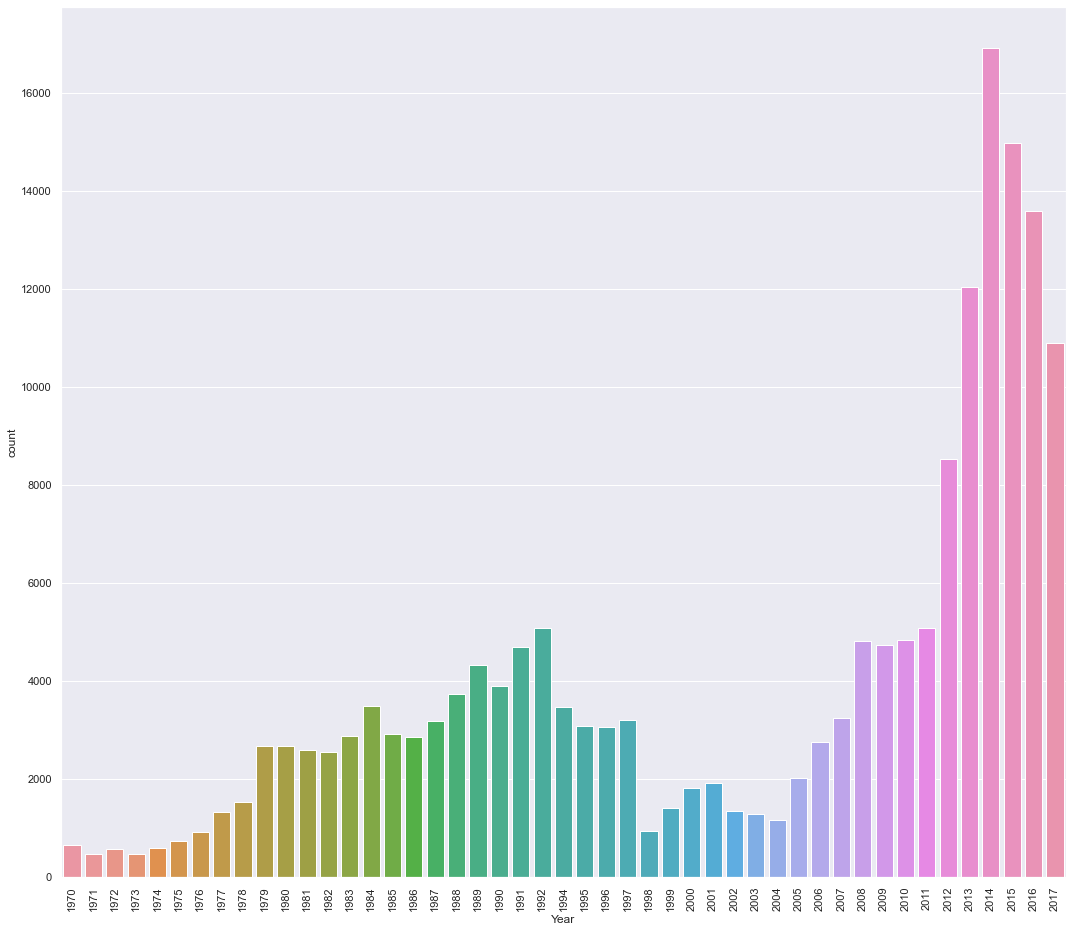

In [20]:
#Identifying the year with the highest attack
plt.figure(figsize=(18,16))
plt.xticks(rotation= 90)
plot1 = sns.countplot(x= gt1['Year'].sort_values(), data= gt1)
plt.show()

2014 has the highest terrorist attacks through all 47 countries and 1971 had the least.

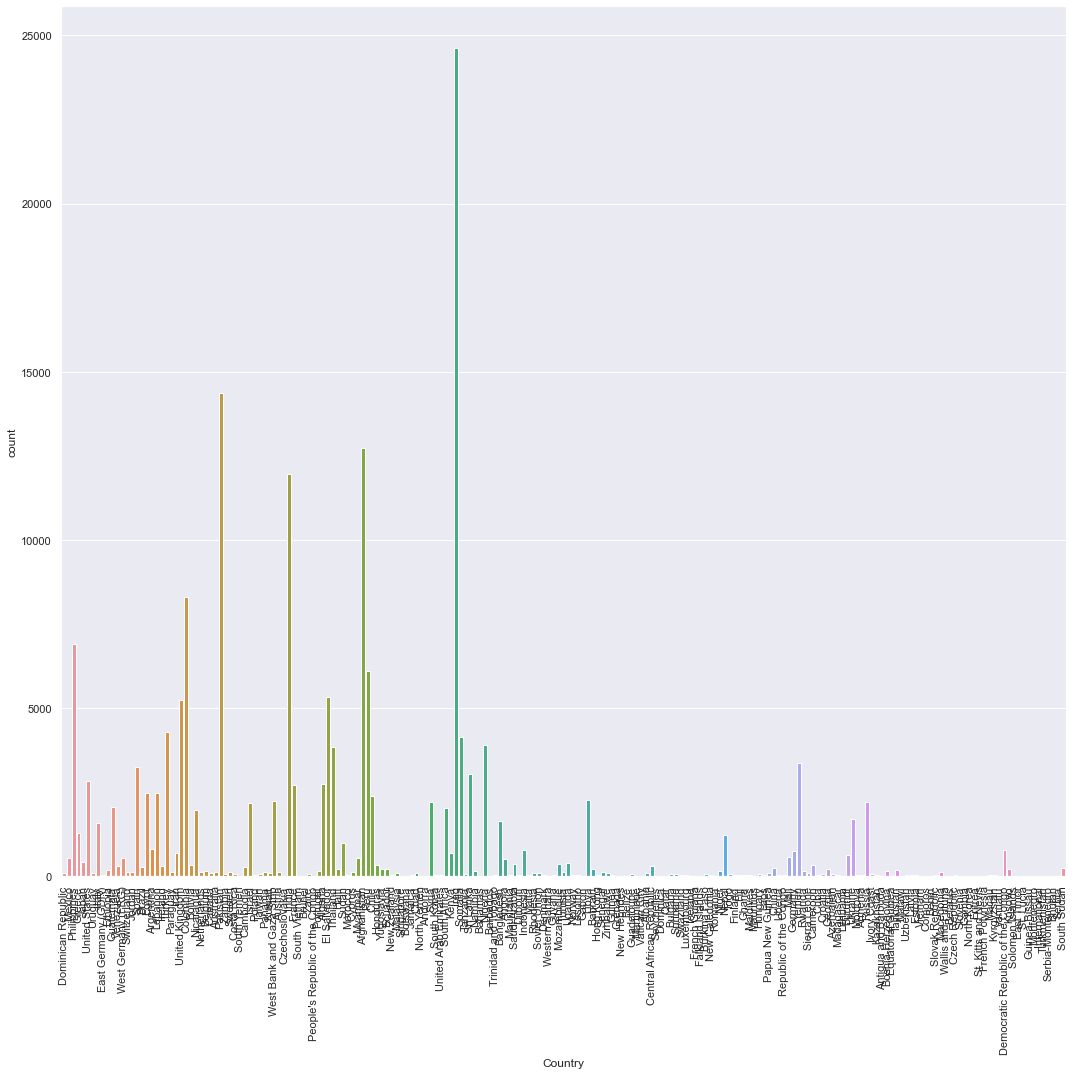

In [21]:
#Identifying the country with the highest attck using countplot
plt.figure(figsize=(18,16))
plt.xticks(rotation= 90)
plot1 = sns.countplot(x= 'Country', data= gt1)
plt.show()

Too many countries (205) to consider. Countplot is a bad visual for it.

In [47]:
#Another approach to the country count
country = pd.DataFrame(gt1.groupby('Country')['Country'].size().sort_values(ascending=False))
country.columns = ['Count']
country_df = country.head(20)
country_df

,Count
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


The top 20 countries with high global terrorism. Iraq, Pakistan and Afghanistan are leading on that.

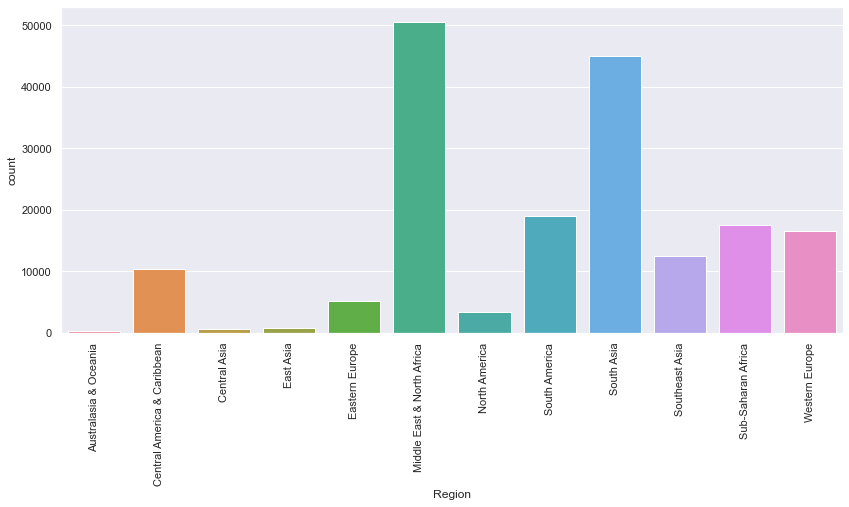

In [51]:
#Checking the region with the highest terrorism
plt.figure(figsize=(14,6))
plt.xticks(rotation= 90)
plot1 = sns.countplot(x= gt1['Region'].sort_values(), data= gt1)
plt.show()

Middle East and North Africa appear to be the popular recipient of terrorist attacks while Australasia & Oceania seem to be at peace with everyone for a long time.

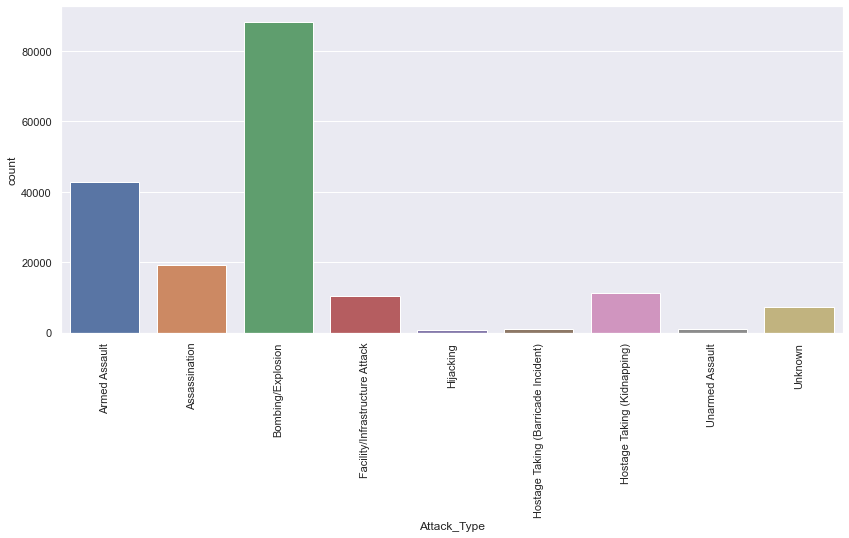

In [52]:
#Checking the highest occuring attact type
plt.figure(figsize=(14,6))
plt.xticks(rotation= 90)
plot1 = sns.countplot(x= gt1['Attack_Type'].sort_values(), data= gt1)
plt.show()

Bombing and explosion are most popular while hiacking is the least favourite of the terrorists.

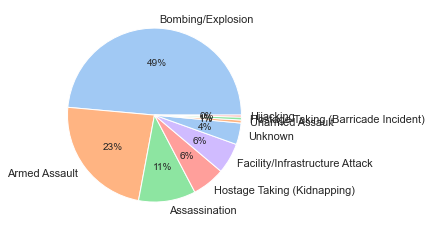

In [66]:
#trying pie chart for attack type data
attack = pd.DataFrame(gt1.groupby('Attack_Type')['Attack_Type'].size().sort_values(ascending=False))
attack.columns = ['Count']

labels = list(attack.index)
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(attack['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

49% of the attacks were from Bombing and explosion. Not great visuals, but... it's something.

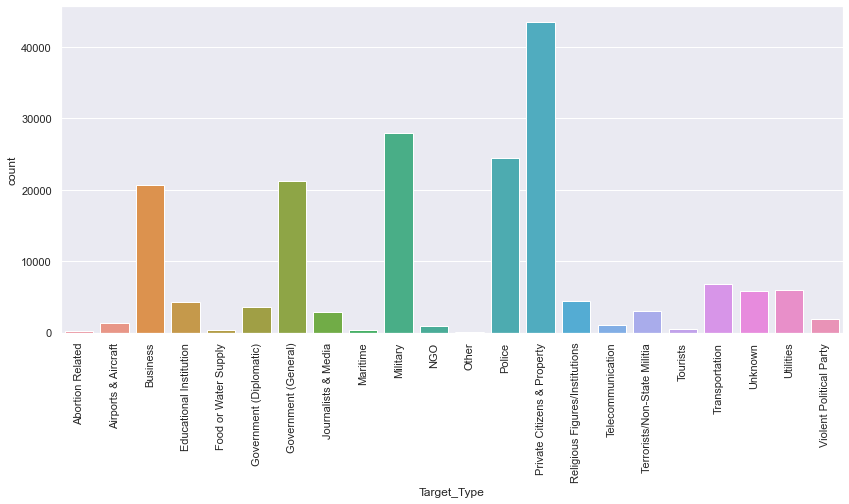

In [69]:
#Target Type visuals
plt.figure(figsize=(14,6))
plt.xticks(rotation= 90)
plot1 = sns.countplot(x= gt1['Target_Type'].sort_values(), data= gt1)
plt.show()

Private citizens and property appear to suffer the brunt of most terrorism attacks globally.

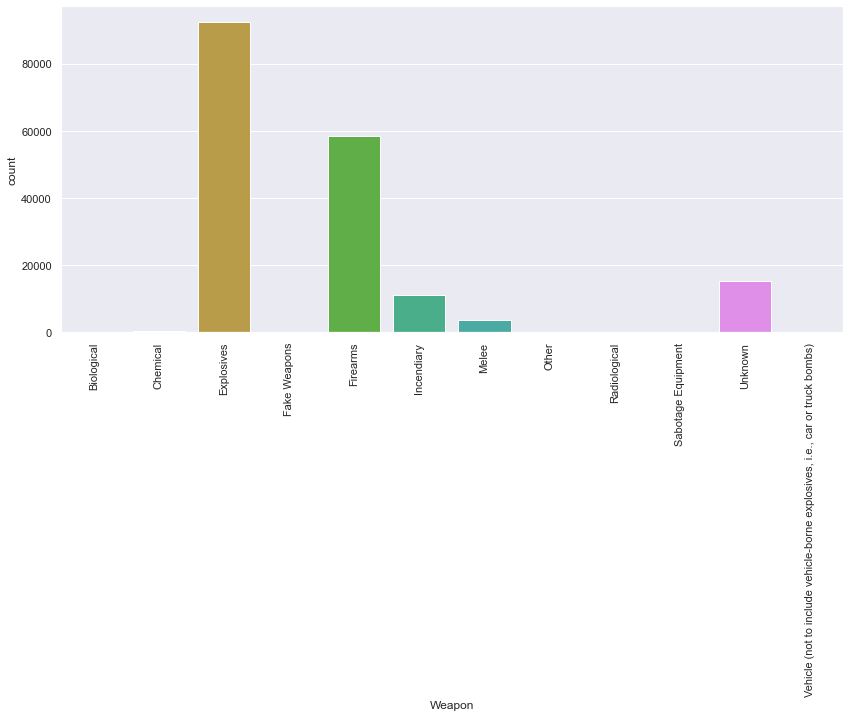

In [71]:
#Weapon Type visual
plt.figure(figsize=(14,6))
plt.xticks(rotation= 90)
plot1 = sns.countplot(x= gt1['Weapon'].sort_values(), data=gt1)
plt.show()

Explosives is the most common weapon which corroborates the data on attack type.

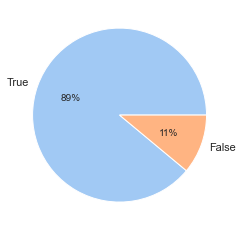

In [72]:
#determining the success rates of global terrorism attacks
success = pd.DataFrame(gt1.groupby('Success')['Success'].size().sort_values(ascending=False))
success.columns = ['Count']

labels = list(success.index)
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(success['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

89% of global terrorism attacks were successful over 47 years.

### Data preprocessing
... First attempt  
Simple preprocessing in 3 steps:  
* Rescaling
* Standardizing
* Normailization

In [73]:
#importing sklearn for preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [74]:
#working with the clean data gt1 or CleanedGlobalTerrorism.csv
gt1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1970.0,1991.0,2009.0,2014.0,2017.0
Month,181691.0,6.467277,3.388303,0.0,4.0,6.0,9.0,12.0
Day,181691.0,15.505644,8.814045,0.0,8.0,15.0,23.0,31.0
No_Of_Killed,181691.0,2.266860,11.227057,0.0,0.0,0.0,2.0,1570.0
No_Of_Wounded,181691.0,2.883296,34.309747,0.0,0.0,0.0,2.0,8191.0
Property,181691.0,-0.544556,3.122889,-9.0,0.0,1.0,1.0,1.0


In [ ]:
#gt1 may not be enough for the preprocessing and modelling, so we'll add the numerical columns for each of our categorical columns
